In [22]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

df = pd.read_csv("life_expectancy.csv")
df.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Total expenditure,Population,Schooling
0,72.6,0,9.85,1137.623700,92,0,58.5,6.84,2141669.0,16.4
1,66.5,30,0.07,0.000000,63,0,51.3,4.36,25627626.0,9.4
2,73.3,1,3.67,192.322631,98,0,45.4,4.80,2728777.0,11.1
3,59.8,1,0.45,20.868787,25,24,3.9,7.72,8942.0,4.5
4,76.0,32,0.01,429.662508,61,15,57.2,5.26,32776571.0,10.5


Given a vectors of responses $y$ and predictors $x$ Simple Linear Regression's goal is to fit a line such that:

$$\hat{y} = \theta_0 + \theta_1x$$

The parameter expressions are obtained my minimising the Least Squares Estimator: $\sum_{i} (y_i - \hat{y}_i)^2$

$$\theta_0 = \bar{y} - \theta_1 \bar{x}$$
$$\theta_1 = \frac{cov(x,y)}{var(x)}$$

Predicting Life expectancy from Schooling:

Coefficients:  2.334857638407736 41.254051417582325
Mean squared error: 37.70


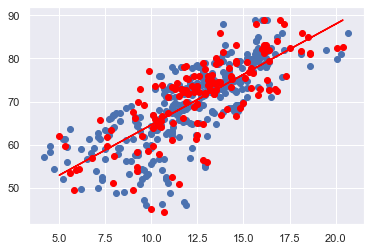

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Feature Selection
x_data = df["Schooling"].values.reshape(-1,1)
y_data = df["Life expectancy"]

#Split data
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.30)
#Create linear regression model
model = LinearRegression()
#Train the model
model.fit(train_x,train_y)
#Predict the targets
predicted_y = model.predict(test_x)

#Output the coefficient
print('Coefficients: ', model.coef_[0], model.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - test_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y, color="red")
plt.plot(test_x,predicted_y,color="red")
plt.show()

When making predictions from large dataset, stochastic gradient may be used.

Gradientdescent iteratively performs an update on some initial theta, taking a step in the direction of steepest decrease in J($\theta$), the cost function:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y_i})$$

Update Rule, where $\alpha$ is a learning rate:

$$\theta_i := \theta_i - \alpha \frac{\delta}{\delta\theta_i}J(\theta)$$

In [26]:
def J(x_data, y_data, theta_0, theta_1):
    m = len(y_data)
    
    cost = 0
    for x in range(0, m):
        cost += (y_data[x] - (theta_0 + theta_1*x_data[x]))**2
        
    return cost / m

def stochastic_gradient_descent(theta_0, theta_1, alpha, x_data, y_data, iterations):
    cost_values = []
    m = len(y_data)
    
    for iteration in range(0, iterations):
        for j in range(0, m):
            theta_0 = theta_0 + alpha * (y_data[j] - (theta_0 + theta_1*x_data[j])) * 1

            theta_1 = theta_1 + alpha * (y_data[j] - (theta_0 + theta_1*x_data[j])) * x_data[j]

        cost_values.append(J(x_data, y_data, theta_0, theta_1))

    return theta_0, theta_1, cost_values
 
    
train_x = df["Schooling"]
train_y = df["Life expectancy"]
    
theta0, theta1, cost_values = stochastic_gradient_descent(-1, -0.5, 0.01, train_x, train_y, 50)

print("Theta_0 = {}".format(theta0))
print("Theta_1 = {}".format(theta1))

Theta_0 = 42.29135470620663
Theta_1 = 2.7363044360517965


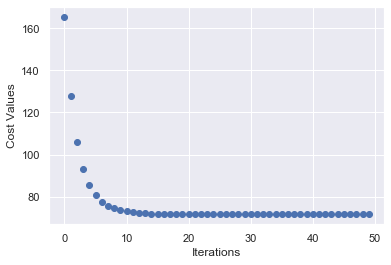

In [31]:
plt.scatter(range(0, 50), cost_values)
plt.xlabel("Iterations")
plt.ylabel("Cost Values")
plt.show()

As can be seen above the cost function settles close to the minimum